In [17]:
import pandas as pd
import io
import requests

import numpy as np
import matplotlib.pyplot as plt

import scipy.linalg as alg

set up a distance matrix $D$

In [5]:
D = np.array([[0,1068,1212,1658,1676,2906,161],
             [1068,0,1890,1516,1057,2564,1122],
             [1212,1890,0,1238,2792,2318,1052],
             [1658,1516,1238,0,2573,1251,1541],
             [1676,1057,2792,2573,0,3562,1809],
             [2906,2564,2318,1251,3562,0,2792],
             [161,1122,1052,1541,1809,2792,0]])
cities = ['Shanghai','Beijing','Guangzhou','Chengdu','Harerbin','Lhasa','Hangzhou']

MDS on $D$

eigenvalues:  [ 8.39728539e+06  3.26396911e+06  1.08839742e+04  5.63886715e-11
 -1.67997185e+02 -1.17072935e+03 -1.62017473e+04]


<ipython-input-38-1cb7046395f0>:17: RuntimeWarning: invalid value encountered in sqrt
  Y = vectors @ np.diag(np.sqrt(values))


(7, 7)

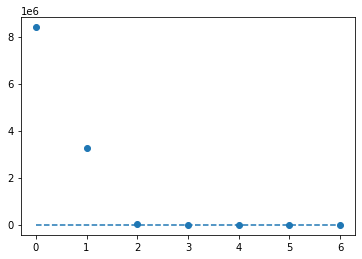

In [38]:
assert D.shape[0]==D.shape[1]
n = D.shape[0]

H = np.eye(n,n) - np.ones((n,n))/n
D1 = - 0.5 * H @ (D*D) @ H  # scaled square distance = Y^T Y
values, vectors = alg.eigh(D1)

sorted_id = np.argsort(-values)
values = values[sorted_id]
vectors = vectors[:,sorted_id]

plt.plot(values,'o');
plt.hlines(0,0,6,linestyle='--');
print('eigenvalues: ',values)


Y = vectors @ np.diag(np.sqrt(values))
Y.shape


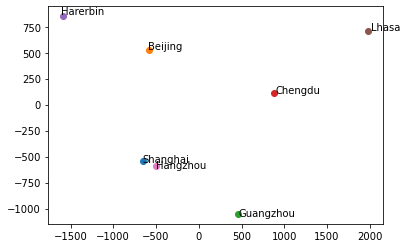

In [40]:
plt.figure()
for i in range(n):
    plt.plot(Y[i,0], Y[i,1],'o')
    plt.text(Y[i,0]*1.02, Y[i,1]*1.02,cities[i])